In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame, skipping the first row
excel_file = r'E:\Phd\Project_PAH\Data\SIRTA_long term_2015_Max Planck_complete_vf02.xlsx'
sheet_name = 'PM_SOA_markers'
dataTable = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=[1])
database=pd.read_excel(excel_file, sheet_name='Database', skiprows=[1])
ox=database['NO2']+database['O3']
rh=database['RH ']


In [11]:
df= dataTable
# Calculate the sum across the specified columns for each row
df["Total"] = df.drop(columns=["Sampling date"]).sum(axis=1)

# Create a new DataFrame with only the date and total
new_df = df[["Sampling date", "Total"]]


In [19]:
isoplethdf = pd.DataFrame({
    'Sampling date': df['Sampling date'],
    'PM_SOA': df['Total'],
    'Ox': ox,
    'RH': rh
})
isoplethdf=isoplethdf.dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31912\210874414.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


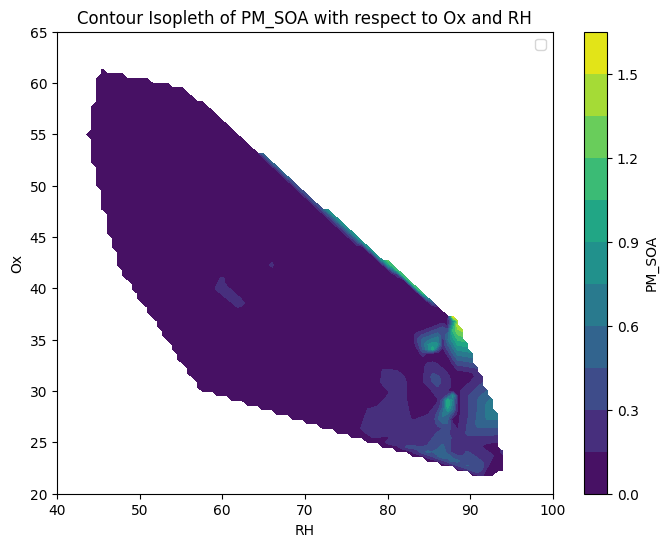

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create DataFrame

# Create a grid for RH and Ox
grid_x, grid_y = np.mgrid[40:100:100j, 20:65:100j]

# Interpolate PM_SOA values on the grid
grid_z = griddata((isoplethdf['RH'], isoplethdf['Ox']), isoplethdf['PM_SOA']/1000, (grid_x, grid_y), method='linear')

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=14, cmap='viridis')
plt.colorbar(contour, label='PM_SOA')
plt.xlabel('RH')
plt.ylabel('Ox')
plt.title('Contour Isopleth of PM_SOA with respect to Ox and RH')
# plt.scatter(isoplethdf['RH'], isoplethdf['Ox'], color='red', label='Data Points')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31912\719656746.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


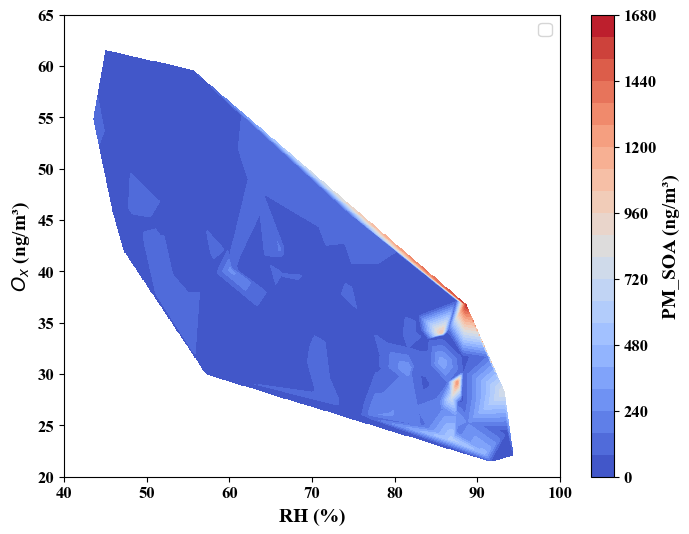

In [60]:
# Create a grid for RH and Ox
grid_x, grid_y = np.mgrid[40:100:500j, 20:65:500j]

# Interpolate PM_SOA values on the grid (scaled down)
grid_z = griddata((isoplethdf['RH'], isoplethdf['Ox']), isoplethdf['PM_SOA'], (grid_x, grid_y), method='linear')
# Set font properties
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    'font.size': 14,  # Change to desired size
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Create the contour plot with blue to red color scheme
plt.figure(figsize=(8, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='coolwarm')  # Change cmap to 'coolwarm'
plt.colorbar(contour, label='PM_SOA (ng/m³)')

plt.xlabel('RH (%)', fontweight='bold')
plt.ylabel(r'$O_{x}$ (ng/m³)', fontweight='bold')
# plt.title('Contour Isopleth of PM_SOA with respect to Ox and RH')
# plt.scatter(isoplethdf['RH'], isoplethdf['Ox'], color='red', label='Data Points')
plt.legend()
plt.show()

In [ ]:
bsoa_columns = ['SUCCINIC ACID', 'ALPHA-METHYLGLYCERIC ACID', 'PINONIC ACID', '3-HYDROXYGLUTARIC ACID',
                '3-(2-HYDROXY-ETHYL)-2,2-DIMETHYLCYCLOBUT', '3-HYDROX-4,4--DIMETHYLGLUTARIC ACID',
                '3-ACETYLPENTANEDIOIC ACID', 'PINIC ACID', '3-ACETYL HEXANEDIOIC ACID', '3-ISOPROPYLPENTANEDIOIC ACID',
                'TERPENYLIC ACID', '2-METHYLTHREITOL', '2-METHYL ERYTHRITOL', 'MBTCA', 'BETA-CARYOPHYLLINIC ACID']

asoa_columns = ['DHOPA', 'PHTHALIC ACID', '2-NITROPHENOL', '4-NITROPHENOL', '2-METHYL-4-NITROPHENOL',
                '4-NITROGUAIACOL', '5-NITROGUAIACOL', '4-METHYL-5-NITROCATHECOL', '3-METHYL-6-NITROCATHECOL',
                '3-METHYL-5-NITROCATHECOL']